### Graduate Admission
Predicting admission from important parameters
 
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are:
 
1. GRE Scores (out of 340)
2. TOEFL Scores (out of 120)
3. University Rating (out of 5)
4. Statement of Purpose and Letter of Recommendation Strength (out of 5)
5. Undergraduate GPA (out of 10)
6. Research Experience (either 0 or 1)
7. Chance of Admit (ranging from 0 to 1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Reading the csv file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Admission_Predict.csv", delimiter=',')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Making a copy from the original datframe
df2 = df.copy()

In [ ]:
# No missing values
df2.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Some name columns had some white space
df2.columns = df2.columns.str.rstrip()

In [ ]:
# Dropping the "Serial No." column as it's useless
df2.drop(["Serial No."], axis=1, inplace=True)

In [ ]:
df2.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


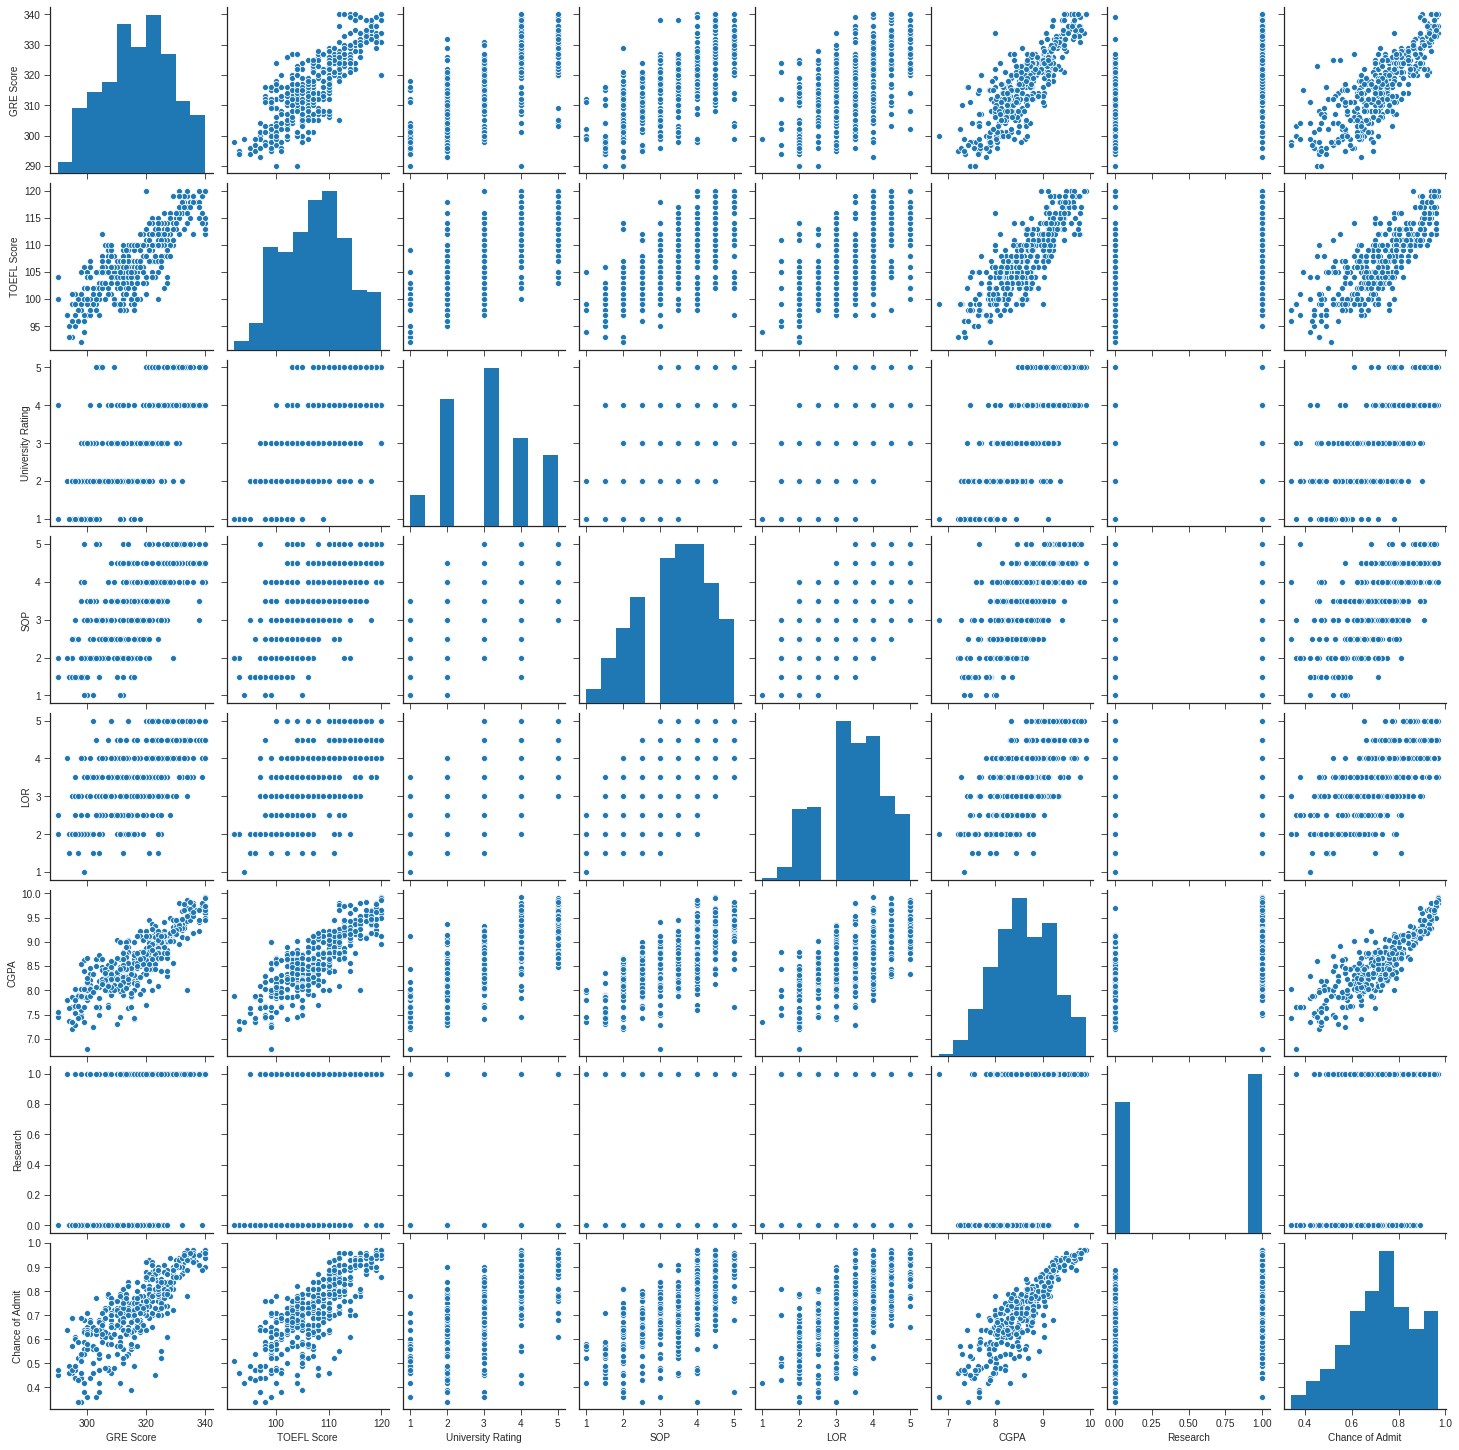

In [ ]:
plt.style.use("seaborn-ticks")
sns.pairplot(df2);

In [ ]:
# Defining X and Y
X = df2.drop(["Chance of Admit"], axis=1)
Y = df2["Chance of Admit"]

In [ ]:
# Training and Test the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

model = linear_model.LinearRegression()

In [ ]:
# Instantiate the model
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.predict([[322, 100, 5, 4.0, 5.0, 8.99, 1]]) # ==> 0.81 % (these are some random numbers)
#GRE Score/	TOEFL Score/ University Rating/	SOP/   LOR   / CGPA /Research
#399        117	         4	               5.0	   4.0	   9.66    1	 ==> 0.95 % (this data belongs to the dataset)  

array([0.80953336])

In [ ]:
# Feature importance using the coefficient value for each feature
importance = model.coef_
for i,v in enumerate(importance):
  print("Feature: %0d, Score: %.4f" % (i,v))

Feature: 0, Score: 0.0019
Feature: 1, Score: 0.0027
Feature: 2, Score: 0.0074
Feature: 3, Score: -0.0003
Feature: 4, Score: 0.0158
Feature: 5, Score: 0.1147
Feature: 6, Score: 0.0222


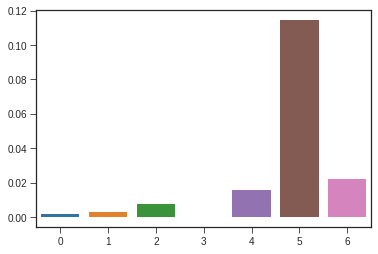

In [ ]:
# Plotting feature importance 
sns.barplot([x for x in range(len(importance))], importance)
plt.show();

,Value,Feature
0,-0.000293,SOP
1,0.001863,GRE Score
2,0.002724,TOEFL Score
3,0.007377,University Rating
4,0.015770,LOR
5,0.022227,Research
6,0.114669,CGPA


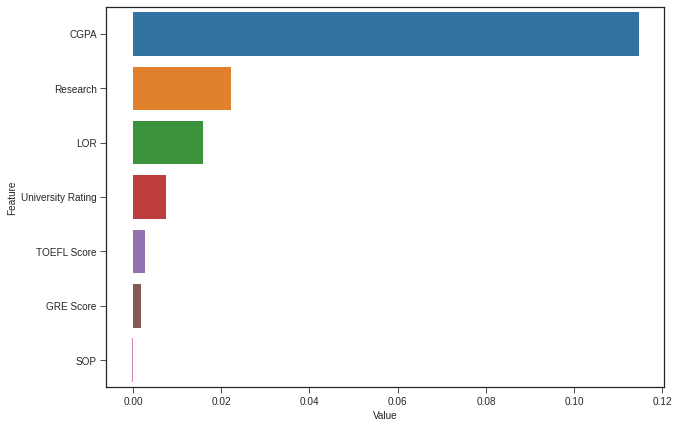

In [ ]:
# Another way of plotting the same feature importance graph above 
Dataframe = pd.DataFrame(sorted(zip(importance, X.columns)),
columns=["Value", "Feature"])
plt.figure(figsize=(10, 7));

sns.barplot(x="Value", y="Feature", data=Dataframe.sort_values(by="Value", ascending=False))
Dataframe

In [ ]:
# Overall score model 
model.score(X_test, Y_test) 

0.8212082591486993